In [3]:
import sys
import os
sys.path.append('../../')

%load_ext autoreload
%autoreload 2
%matplotlib inline

os.environ['CUDA_VISIBLE_DEVICES'] = '0'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
import numpy as np

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

from skimage.io import imread

from gen.load_data import load_data

In [5]:
from sklearn.utils import shuffle

train_df, valid_df, test_df = load_data('../../data')


print(train_df.head())


                                               image                   id  \
0  ../../data/Train/CameraRGB/episode_0002_000287...  episode_0002_000287   
1  ../../data/Train/CameraRGB/episode_0008_000112...  episode_0008_000112   
2                 ../../data/Train/CameraRGB/804.png                  804   
3  ../../data/Train/CameraRGB/episode_0008_000286...  episode_0008_000286   
4  ../../data/Train/CameraRGB/episode_0003_000261...  episode_0003_000261   

                                               label  
0  ../../data/Train/CameraSeg/episode_0002_000287...  
1  ../../data/Train/CameraSeg/episode_0008_000112...  
2                 ../../data/Train/CameraSeg/804.png  
3  ../../data/Train/CameraSeg/episode_0008_000286...  
4  ../../data/Train/CameraSeg/episode_0003_000261...  


In [6]:
from models.segnet import model_segnetVGG16

model = model_segnetVGG16(3, image_shape=(320, 416, 3))
# model.reset_states()
model.load_weights('../../saved_models/segnet/segnet_v1//model.hdf5')
# model.save('../../saved_models/segnet/segnet_v1//model_saved.h5')
# model.summary()

/home/faisal/anaconda3/envs/ai/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [7]:
from gen.datagen import oversample_generator_from_df, balanced_generator_from_df

BATCH_SIZE = 16
model_dir = '../../saved_models/segnet/segnet_v2/'

if not os.path.exists(model_dir):
    os.mkdir(model_dir)

train_gen = oversample_generator_from_df(train_df, BATCH_SIZE, (320, 416))
valid_gen = balanced_generator_from_df(valid_df, BATCH_SIZE, (320, 416))

In [8]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy', 'mse'])


In [9]:
from train import train_nn

m = train_df.shape[0]
history = train_nn(model, 
                   train_gen, 
                   valid_gen, 
                   training_size=1200, 
                   batch_size=BATCH_SIZE,
                   validation_size=valid_df.shape[0],
                   output_path=model_dir, 
                   epochs=500,
                   gpus = 1)

Instructions for updating:
Use the retry module or similar alternatives.
Epoch 1/500
75/75 [==============================] - 132s 2s/step - loss: 0.0286 - acc: 0.9867 - val_loss: 0.0379 - val_acc: 0.9877

Epoch 00001: val_loss improved from inf to 0.03793, saving model to ../../saved_models/segnet/segnet_v2//model.hdf5
Epoch 2/500
75/75 [==============================] - 52s 687ms/step - loss: 0.0220 - acc: 0.9893 - val_loss: 0.0309 - val_acc: 0.9892

Epoch 00002: val_loss improved from 0.03793 to 0.03091, saving model to ../../saved_models/segnet/segnet_v2//model.hdf5
Epoch 3/500
75/75 [==============================] - 52s 692ms/step - loss: 0.0218 - acc: 0.9893 - val_loss: 0.0321 - val_acc: 0.9890

Epoch 00003: val_loss did not improve
Epoch 4/500
75/75 [==============================] - 52s 692ms/step - loss: 0.0210 - acc: 0.9895 - val_loss: 0.0349 - val_acc: 0.9877

Epoch 00004: val_loss did not improve
Epoch 5/500
75/75 [==============================] - 52s 693ms/step - loss: 0

75/75 [==============================] - 52s 694ms/step - loss: 0.0158 - acc: 0.9913 - val_loss: 0.0340 - val_acc: 0.9895

Epoch 00044: val_loss did not improve
Epoch 45/500
75/75 [==============================] - 52s 694ms/step - loss: 0.0153 - acc: 0.9915 - val_loss: 0.0295 - val_acc: 0.9906

Epoch 00045: val_loss improved from 0.02986 to 0.02946, saving model to ../../saved_models/segnet/segnet_v2//model.hdf5
Epoch 46/500
75/75 [==============================] - 52s 693ms/step - loss: 0.0154 - acc: 0.9915 - val_loss: 0.0300 - val_acc: 0.9907

Epoch 00046: val_loss did not improve
Epoch 47/500
75/75 [==============================] - 52s 695ms/step - loss: 0.0151 - acc: 0.9916 - val_loss: 0.0318 - val_acc: 0.9903

Epoch 00047: val_loss did not improve
Epoch 48/500
75/75 [==============================] - 52s 694ms/step - loss: 0.0151 - acc: 0.9916 - val_loss: 0.0307 - val_acc: 0.9901

Epoch 00048: val_loss did not improve
Epoch 49/500
75/75 [==============================] - 52s 699

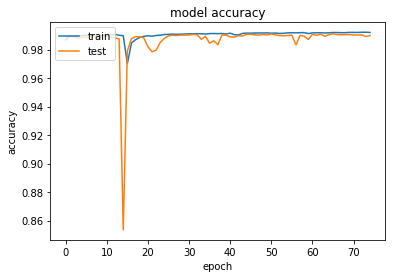

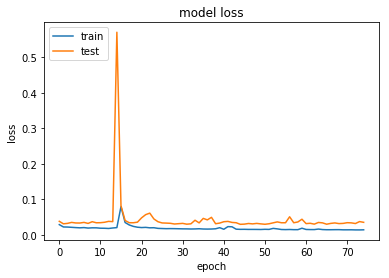

In [10]:
# # summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [11]:
model.load_weights('../../saved_models/segnet/segnet_v2//model.hdf5')
model.save('../../saved_models/segnet/segnet_v2/model_saved.h5')